In [1]:
import os
import time
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
seed = 2017
path = '/Users/zhouzhirui/data/Mercari_Price_Forcast'
os.chdir(path)

train = pd.read_csv('./data/local_train.csv')
val = pd.read_csv('./data/local_val.csv')

In [2]:
train_x = pd.DataFrame()
train_x['brand_name_in_name'] = [1 if train.iloc[i, 3] in train.iloc[i, 0] else 0 for i in range(train.shape[0])]
train_x['brand_name_in_desc'] = [1 if train.iloc[i, 3] in train.iloc[i, 5] else 0 for i in range(train.shape[0])]

In [3]:
val_x = pd.DataFrame()
val_x['brand_name_in_name'] = [1 if val.iloc[i, 3] in val.iloc[i, 0] else 0 for i in range(val.shape[0])]
val_x['brand_name_in_desc'] = [1 if val.iloc[i, 3] in val.iloc[i, 5] else 0 for i in range(val.shape[0])]

In [4]:
train_cate_cut = train.category_name.str.split('/')
test_cate_cut = val.category_name.str.split('/')

In [9]:
train_x[['cate_%d'%(i) for i in range(5)]] = pd.DataFrame(train_cate_cut.tolist()).fillna('missing')
val_x[['cate_%d'%(i) for i in range(5)]] = pd.DataFrame(test_cate_cut.tolist()).fillna('missing')

In [12]:
train_x[['item_condition_id', 'brand_name','shipping']] = train[['item_condition_id', 'brand_name','shipping']]
val_x[['item_condition_id', 'brand_name','shipping']] = val[['item_condition_id', 'brand_name','shipping']]

In [ ]:
le_brand_name = LabelEncoder()
le_brand_name.fit(np.hstack([val_x.brand_name.values, train_x.brand_name.values]))
train_x['brand_name'] = le_brand_name.transform(train_x['brand_name'])
val_x['brand_name'] = le_brand_name.transform(val_x['brand_name'])

In [28]:
for i in range(5):
    le_category_name = LabelEncoder()
    le_category_name.fit(np.hstack([val_x['cate_%d'%(i)].values, train_x['cate_%d'%(i)].values]))
    train_x['cate_%d'%(i)] = le_category_name.transform(train_x['cate_%d'%(i)])
    val_x['cate_%d'%(i)] = le_category_name.transform(val_x['cate_%d'%(i)])

/Users/zhouzhirui/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
xgb_train = xgb.DMatrix(train_x.values, 
                        train['price'].values,
                        feature_names=train_x.columns.tolist())

xgb_val = xgb.DMatrix(val_x.values, 
                      val['price'].values,
                      feature_names=val_x.columns.tolist())

xgb_param = {
    'eta':0.05,
    'subsample':0.7,
    'colsample_bytree':0.9,
    'colsample_bytree':0.9
}
model = xgb.train(xgb_param, xgb_train, 
                  num_boost_round=500, 
                  evals=[(xgb_val,'validation')], 
                  early_stopping_rounds=10)

[0]	validation-rmse:45.226
Will train until validation-rmse hasn't improved in 10 rounds.
[1]	validation-rmse:44.324
[2]	validation-rmse:43.5203
[3]	validation-rmse:42.7538
[4]	validation-rmse:42.0251
[5]	validation-rmse:41.3675
[6]	validation-rmse:40.7745
[7]	validation-rmse:40.2098
[8]	validation-rmse:39.6834
[9]	validation-rmse:39.1988
[10]	validation-rmse:38.755
[11]	validation-rmse:38.3211
[12]	validation-rmse:37.9359
[13]	validation-rmse:37.5951
[14]	validation-rmse:37.2348
[15]	validation-rmse:36.9599
[16]	validation-rmse:36.6993
[17]	validation-rmse:36.4325
[18]	validation-rmse:36.2208
[19]	validation-rmse:35.9744
[20]	validation-rmse:35.7803
[21]	validation-rmse:35.6131
[22]	validation-rmse:35.4487
[23]	validation-rmse:35.303
[24]	validation-rmse:35.1632
[25]	validation-rmse:35.0179
[26]	validation-rmse:34.8864
[27]	validation-rmse:34.7682
[28]	validation-rmse:34.6649
[29]	validation-rmse:34.5346
[30]	validation-rmse:34.4561
[31]	validation-rmse:34.3417
[32]	validation-rmse:34

[276]	validation-rmse:31.2884
[277]	validation-rmse:31.286
[278]	validation-rmse:31.2776
[279]	validation-rmse:31.2739
[280]	validation-rmse:31.2705
[281]	validation-rmse:31.2667
[282]	validation-rmse:31.2633
[283]	validation-rmse:31.2625
[284]	validation-rmse:31.2597
[285]	validation-rmse:31.2585
[286]	validation-rmse:31.2551
[287]	validation-rmse:31.2513
[288]	validation-rmse:31.2464
[289]	validation-rmse:31.2455
[290]	validation-rmse:31.24
[291]	validation-rmse:31.237
[292]	validation-rmse:31.2319
[293]	validation-rmse:31.2311
[294]	validation-rmse:31.2278
[295]	validation-rmse:31.2231
[296]	validation-rmse:31.2165
[297]	validation-rmse:31.2119
[298]	validation-rmse:31.2109
[299]	validation-rmse:31.2103
[300]	validation-rmse:31.2072
[301]	validation-rmse:31.2035
[302]	validation-rmse:31.2028
[303]	validation-rmse:31.2005
[304]	validation-rmse:31.2
[305]	validation-rmse:31.1986
[306]	validation-rmse:31.195
[307]	validation-rmse:31.1929
[308]	validation-rmse:31.1868
[309]	validation-r

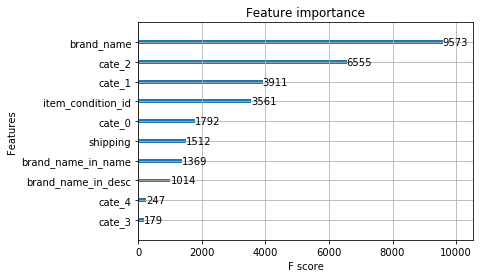

In [31]:
xgb.plot_importance(model)

In [32]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    y_pred[np.where(y_pred<0)] = 0
    y_log = np.log(y+1)
    y_pred_log = np.log(y_pred+1)
    score = np.sqrt(np.mean(np.square(y_log-y_pred_log)))
    return score

In [33]:
rmsle(val.price.values, model.predict(xgb_val))

0.61862726520067379